In [3]:
# Botorch and Ax imports.
from ax import json_load
from ax.modelbridge.registry import Models
from ax.models.torch.botorch_modular.surrogate import Surrogate
from ax.core.observation import ObservationFeatures
from botorch.models.gp_regression import SingleTaskGP
from botorch.acquisition.monte_carlo import qNoisyExpectedImprovement
from ax.service.utils.report_utils import exp_to_df

# Other library imports.
import matplotlib.pyplot as plt
import numpy as np
import scipy
import os

In [36]:
# Path to BoTorch experiments directory.
exp_dir = r"C:\Users\ay434\Box\Research\Flood_Sim_Materials\BayesOpt_Paper\Data\Roughness_Output"

# Path to figure save directory.
save_dir = r"C:\Users\ay434\Box\Research\Flood_Sim_Materials\BayesOpt_Paper\Figures\Roughness_Case_Study"

# Name of experiment.
exp_name = "BT_exp_c4s3.json"

# Load the experiment.
exp_fp = os.path.join(exp_dir, exp_name)
exp = json_load.load_experiment(exp_fp)

# Extract parameters.
pars = list(exp.parameters.values())

# Experiment result.
results_df = exp_to_df(exp)

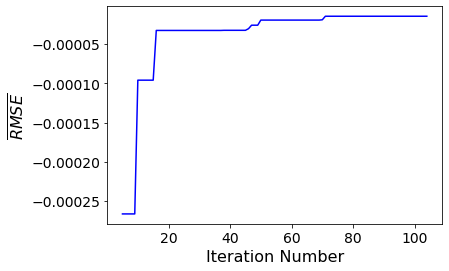

In [37]:
# Plot the performance over each iteration.
best_func = []
for i in range(results_df.shape[0]):
    # Get the first i rows of the results.
    sample_df = results_df.iloc[:i+1,:]
    
    # Maximum function value of the sample rows.
    sort_sample_df = sample_df.sort_values(by='_run_with_loss', ascending=False)
    sort_sample_df.reset_index(inplace=True)
    best_func.append(sort_sample_df.loc[0, '_run_with_loss'])
    
iter_start = 5
fig, ax = plt.subplots()
ax.plot(list(range(iter_start, len(best_func))), best_func[iter_start:], 'b-')
ax.set_xlabel('Iteration Number', fontsize=16)
ax.set_ylabel('$\overline{RMSE}$', fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Save the figure.
save_fp = os.path.join(save_dir, os.path.splitext(exp_name)[0] + '_IterPlot.png')
fig.savefig(save_fp, dpi=300)